In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def non_markovian_midprice(inital_prices, 
                        permenant_price_impact_func, 
                        nu_vals,
                        kernel_function, 
                        dt, 
                        rng,
                        num_paths,
                        num_timesteps,
                        sigma):

    final_time = num_timesteps*dt

    permenant_price_impact_vals = permenant_price_impact_func(nu_vals)
    kernel_vals = np.array([kernel_function(final_time, timestep*dt) for timestep in range(num_timesteps)])
    kernel_integrand = kernel_vals.reshape(-1,1) * permenant_price_impact_vals * dt
    kernel_integrand = np.vstack([inital_prices, kernel_integrand])
    kernel_integral = np.cumsum(kernel_integrand, axis=0)

    brownian_motion_integrand = sigma*(dt**0.5)*rng.normal(0,1, size=(num_timesteps, num_paths)) 
    zeros = np.zeros((1, num_paths))
    brownian_motion_integrand = np.vstack([zeros, brownian_motion_integrand])

    brownian_motion_integral = np.cumsum(brownian_motion_integrand, axis=0)
    prices = kernel_integral+brownian_motion_integral

    return prices

In [21]:
rng = np.random.default_rng(123)

num_paths = 100
num_timesteps = 1000
final_time = 1
dt = final_time/num_timesteps
inital_prices = np.ones((1, num_paths))
permenant_price_impact_func = lambda x: x
nu_vals = rng.uniform(-10, 10,size=(num_timesteps, num_paths))
kernel_function = lambda x,y: (np.abs((x-y)+1e-3)**(0.51-1))
sigma = 0.1

In [22]:
sim_prices = non_markovian_midprice(inital_prices=inital_prices,
                             permenant_price_impact_func=permenant_price_impact_func,
                             nu_vals=nu_vals,
                             kernel_function=kernel_function,
                             dt=dt,
                             rng=rng,
                             num_paths=num_paths,
                             num_timesteps=num_timesteps,
                             sigma=sigma)

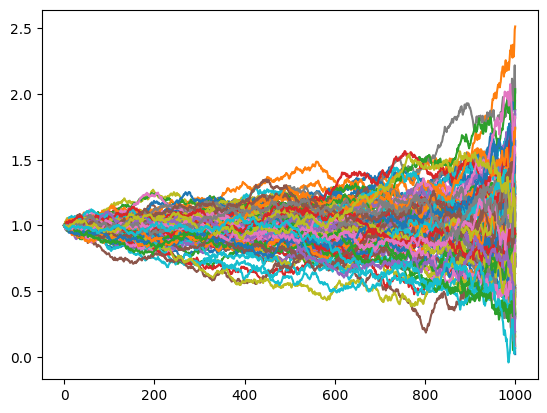

In [23]:
plt.plot(sim_prices)
plt.show()